<a href="https://colab.research.google.com/github/wkwii97/next-gen-stats/blob/main/NextGenStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#SciKit-Learn Installation
#!pip install scikit-learn

In [ ]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot as plt # plt is for plotting
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

# Data processing package 
import pandas as pd

#Scikit-Learn packages
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Mount Drive to Co Lab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Set mmax number of columns in our data set to 30 for a better view of the coulmns
pd.set_option("display.max_columns", 30)

In [ ]:
# Read comma separated data
O_Data = pd.read_csv('/content/drive/My Drive/Machine Learning/Final Project/Datasets/O_D/NFL_Offensive_Data.csv', low_memory = False)
D_Data = pd.read_csv('/content/drive/My Drive/Machine Learning/Final Project/Datasets/O_D/NFL_Defensive_Data.csv', low_memory = False)

O_Data.loc[:50]

#X, y = data[:, 0], data[:, 1]

#m = y.size  # number of training examples

,game_id,player_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,rush_att,...,off_pct,vis_team,home_team,vis_score,home_score,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,Vegas_Line,Vegas_Favorite,Over_Under,game_date
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,18,30,203,1,0,5,37,47,91.4,3,...,100,GNB,CHI,10,3,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
1,201909050chi,JoneAa00,RB,Aaron Jones,GNB,0,0,0,0,0,0,0,0,0.0,13,...,61,GNB,CHI,10,3,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
2,201909050chi,ValdMa00,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,0,0,0,0.0,1,...,67,GNB,CHI,10,3,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
3,201909050chi,AdamDa01,WR,Davante Adams,GNB,0,0,0,0,0,0,0,0,0.0,0,...,97,GNB,CHI,10,3,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
4,201909050chi,GrahJi00,TE,Jimmy Graham,GNB,0,0,0,0,0,0,0,0,0.0,0,...,54,GNB,CHI,10,3,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
5,201909050chi,DaviTr03,WR,Trevor Davis,GNB,0,0,0,0,0,0,0,0,0.0,0,...,28,GNB,CHI,10,3,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
6,201909050chi,TonyRo00,TE,Robert Tonyan,GNB,0,0,0,0,0,0,0,0,0.0,0,...,31,GNB,CHI,10,3,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
7,201909050chi,WillJa06,RB,Jamaal Williams,GNB,0,0,0,0,0,0,0,0,0.0,5,...,39,GNB,CHI,10,3,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
8,201909050chi,LewiMa00,TE,Marcedes Lewis,GNB,0,0,0,0,0,0,0,0,0.0,0,...,54,GNB,CHI,10,3,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
9,201909050chi,TrubMi00,QB,Mitchell Trubisky,CHI,26,45,228,0,1,5,20,27,62.1,3,...,100,GNB,CHI,10,3,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05


In [ ]:
#Cleaning up Offensive data, only want QB data right now
QB_Data = O_Data.loc[(O_Data.pos.isin(['QB']))]

QB_Data.loc[O_Data.pos==1, 'pos'] = 'QB'

In [ ]:
#Reset the index to make sure there's no missing numbers
QB_Data.reset_index(drop=True, inplace=True)

In [ ]:
#Put QB Data into its own CSV File
QB_Data.to_csv('QB_Data.csv', index=False)

In [ ]:
#QB Data
QB_Data.loc[:50]

,game_id,player_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,rush_att,...,off_pct,vis_team,home_team,vis_score,home_score,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,Vegas_Line,Vegas_Favorite,Over_Under,game_date
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,18,30,203,1,0,5,37,47,91.4,3,...,100,GNB,CHI,10,3,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
1,201909050chi,TrubMi00,QB,Mitchell Trubisky,CHI,26,45,228,0,1,5,20,27,62.1,3,...,100,GNB,CHI,10,3,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
2,201909080car,GoffJa00,QB,Jared Goff,LAR,23,39,186,1,1,1,3,24,69.0,4,...,100,LAR,CAR,30,27,False,outdoors,grass,87,53,3,-1.5,LAR,49.5,2019-09-08
3,201909080car,NewtCa00,QB,Cam Newton,CAR,25,38,239,0,1,3,23,17,72.1,3,...,100,LAR,CAR,30,27,False,outdoors,grass,87,53,3,-1.5,LAR,49.5,2019-09-08
4,201909080cle,MariMa01,QB,Marcus Mariota,TEN,14,24,248,3,0,4,32,75,133.3,3,...,97,TEN,CLE,43,13,False,outdoors,grass,71,55,10,-5.5,CLE,44.0,2019-09-08
5,201909080cle,TannRy00,QB,Ryan Tannehill,TEN,0,0,0,0,0,0,0,0,0.0,2,...,3,TEN,CLE,43,13,False,outdoors,grass,71,55,10,-5.5,CLE,44.0,2019-09-08
6,201909080cle,MayfBa00,QB,Baker Mayfield,CLE,25,38,285,1,3,5,41,35,64.0,0,...,100,TEN,CLE,43,13,False,outdoors,grass,71,55,10,-5.5,CLE,44.0,2019-09-08
7,201909080crd,StafMa00,QB,Matthew Stafford,DET,27,45,385,3,0,3,24,47,110.0,3,...,100,DET,ARI,27,27,True,retractable roof (closed),grass,72,45,0,-2.5,DET,45.5,2019-09-08
8,201909080crd,MurrKy00,QB,Kyler Murray,ARI,29,54,308,2,1,5,33,45,75.2,3,...,100,DET,ARI,27,27,True,retractable roof (closed),grass,72,45,0,-2.5,DET,45.5,2019-09-08
9,201909080dal,PresDa01,QB,Dak Prescott,DAL,25,32,405,4,0,0,0,62,158.3,4,...,96,NYG,DAL,17,35,False,retractable roof (closed),fieldturf,72,45,0,-7.0,DAL,44.0,2019-09-08


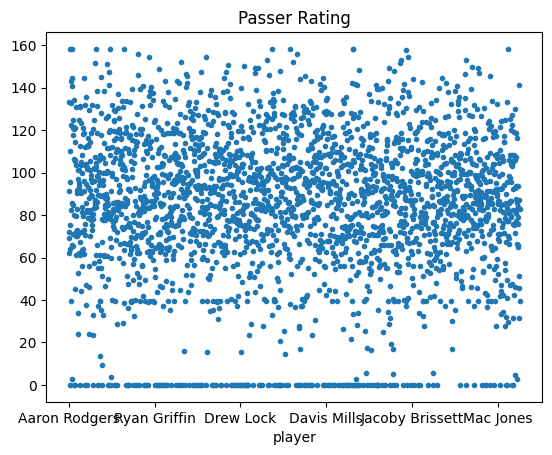

In [ ]:
#Plotting our QB Rating for every QB
QB_Data.set_index('player')['pass_rating'] \
    .plot(style = '.', title = 'Passer Rating')
plt.show()

In [ ]:
# We have a bunch of QB's with a 0 or low number for pass rating, we don't want them
# The following code gets rid of all QB's with a pass rating not >= 50
# A pass rating of 50 is what is defined as a pass rating for an "Average NFL Quarterback"
# Second line sorts values by player name, in order from first to last game
new_QB_Data = pd.DataFrame(QB_Data.loc[QB_Data['pass_rating'] >= 50])
new_QB_Data = new_QB_Data.sort_values(by = ["player", "game_date"])
new_QB_Data.loc[:50]

,game_id,player_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,rush_att,...,off_pct,vis_team,home_team,vis_score,home_score,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,Vegas_Line,Vegas_Favorite,Over_Under,game_date
584,201912290htx,McCaA.00,QB,A.J. McCarron,HOU,21,36,225,0,1,4,33,21,65.2,5,...,100,TEN,HOU,35,14,False,retractable roof (closed),grass,72,45,0,-10.0,TEN,43.0,2019-12-29
1249,202101030htx,McCaA.00,QB,A.J. McCarron,HOU,1,1,20,0,0,0,0,20,118.7,0,...,0,TEN,HOU,41,38,False,retractable roof (closed),grass,72,45,0,-7.0,TEN,55.5,2021-01-03
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,18,30,203,1,0,5,37,47,91.4,3,...,100,GNB,CHI,10,3,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
52,201909150gnb,RodgAa00,QB,Aaron Rodgers,GNB,22,34,209,2,0,2,18,39,101.2,1,...,100,MIN,GNB,16,21,False,outdoors,grass,72,75,5,-3.0,GNB,43.0,2019-09-15
91,201909220gnb,RodgAa00,QB,Aaron Rodgers,GNB,17,29,235,1,0,0,0,40,96.2,1,...,100,DEN,GNB,16,27,False,outdoors,grass,69,93,7,-7.0,GNB,42.0,2019-09-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,202212240kan,MahoPa00,QB,Patrick Mahomes,KAN,16,28,224,2,0,1,4,52,106.8,2,...,100,SEA,KAN,10,24,False,outdoors,grass,12,61,9,NaN,NaN,NaN,2022-12-24
2564,202301010kan,MahoPa00,QB,Patrick Mahomes,KAN,29,42,328,3,1,0,0,38,106.1,4,...,100,DEN,KAN,24,27,False,outdoors,grass,47,80,2,NaN,NaN,NaN,2023-01-01
2590,202301070rai,MahoPa00,QB,Patrick Mahomes,KAN,18,26,202,1,0,2,21,67,105.0,3,...,88,KAN,LVR,31,13,False,dome,grass,72,45,0,NaN,NaN,NaN,2023-01-07
30,201909080sdg,RivePh00,QB,Philip Rivers,LAC,25,34,333,3,1,4,23,55,121.3,1,...,100,IND,LAC,24,30,True,outdoors,grass,77,52,10,-6.0,LAC,44.5,2019-09-08


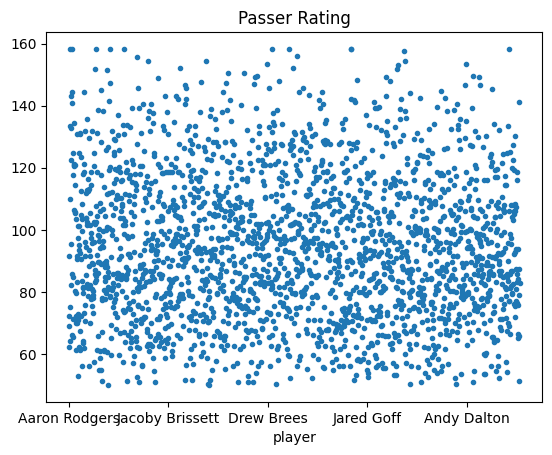

In [ ]:
#Re Plotting our QB Rating for every QB
new_QB_Data.set_index('player')['pass_rating'] \
    .plot(style = '.', title = 'Passer Rating')
plt.show()

In [ ]:
# Sets base pred to 50
base_pred = 50
for i in range(len(new_QB_Data)):
  new_QB_Data['base_pred'] = base_pred

new_QB_Data.loc[:50]

,game_id,player_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,rush_att,...,vis_team,home_team,vis_score,home_score,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,Vegas_Line,Vegas_Favorite,Over_Under,game_date,base_pred
584,201912290htx,McCaA.00,QB,A.J. McCarron,HOU,21,36,225,0,1,4,33,21,65.2,5,...,TEN,HOU,35,14,False,retractable roof (closed),grass,72,45,0,-10.0,TEN,43.0,2019-12-29,50
1249,202101030htx,McCaA.00,QB,A.J. McCarron,HOU,1,1,20,0,0,0,0,20,118.7,0,...,TEN,HOU,41,38,False,retractable roof (closed),grass,72,45,0,-7.0,TEN,55.5,2021-01-03,50
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,18,30,203,1,0,5,37,47,91.4,3,...,GNB,CHI,10,3,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05,50
52,201909150gnb,RodgAa00,QB,Aaron Rodgers,GNB,22,34,209,2,0,2,18,39,101.2,1,...,MIN,GNB,16,21,False,outdoors,grass,72,75,5,-3.0,GNB,43.0,2019-09-15,50
91,201909220gnb,RodgAa00,QB,Aaron Rodgers,GNB,17,29,235,1,0,0,0,40,96.2,1,...,DEN,GNB,16,27,False,outdoors,grass,69,93,7,-7.0,GNB,42.0,2019-09-22,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,202212240kan,MahoPa00,QB,Patrick Mahomes,KAN,16,28,224,2,0,1,4,52,106.8,2,...,SEA,KAN,10,24,False,outdoors,grass,12,61,9,NaN,NaN,NaN,2022-12-24,50
2564,202301010kan,MahoPa00,QB,Patrick Mahomes,KAN,29,42,328,3,1,0,0,38,106.1,4,...,DEN,KAN,24,27,False,outdoors,grass,47,80,2,NaN,NaN,NaN,2023-01-01,50
2590,202301070rai,MahoPa00,QB,Patrick Mahomes,KAN,18,26,202,1,0,2,21,67,105.0,3,...,KAN,LVR,31,13,False,dome,grass,72,45,0,NaN,NaN,NaN,2023-01-07,50
30,201909080sdg,RivePh00,QB,Philip Rivers,LAC,25,34,333,3,1,4,23,55,121.3,1,...,IND,LAC,24,30,True,outdoors,grass,77,52,10,-6.0,LAC,44.5,2019-09-08,50


In [ ]:
# Setting up our X and Y for split & regression
X = new_QB_Data[['bias', 'pass_yds', 'pass_td', 'pass_int']]
Y = new_QB_Data['base_pred']
print("X Split \n")
print(X.head(10))
print("\n ----------------------------------------------- \n")
print("Y Split \n")
print(Y.head(10))
print ("\n ----------------------------------------------- \n")

# Split up our data into test and training sets (80/20)
x_train = X[1:2104]
y_train = Y[1:2104]
x_test = X[2105:]
y_test = Y[2105:]

# print the data
print("x_train \n")
print(x_train)

X Split 

      bias  pass_yds  pass_td  pass_int
584      1       225        0         1
1249     1        20        0         0
0        1       203        1         0
52       1       209        2         0
91       1       235        1         0
115      1       422        2         1
155      1       238        0         0
215      1       283        2         1
238      1       429        5         0
267      1       305        3         0

 ----------------------------------------------- 

Y Split 

584     50
1249    50
0       50
52      50
91      50
115     50
155     50
215     50
238     50
267     50
Name: base_pred, dtype: int64

 ----------------------------------------------- 

x_train 

      bias  pass_yds  pass_td  pass_int
1249     1        20        0         0
0        1       203        1         0
52       1       209        2         0
91       1       235        1         0
115      1       422        2         1
...    ...       ...      ...       ...
1187  

In [ ]:
# Create linear regression object
model1 = linear_model.Lasso(alpha=0.1)

# Train the model using training sets
model1.fit(x_train, y_train)

# Model makes predictions using the testing set
pred1 = model1.predict(x_test)
print(pred1)

[50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.
 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50. 50.]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Plot outputs
#plt.scatter(x_test, y_test, color="black")
#plt.plot(x_test, pred1, color="blue", linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.tight_layout()

print("Model 1 (Base System) \n")
# The score 
print("Score: %.8f " % model1.score(x_test, y_test))
# The coefficients
print("Coefficients: ", model1.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, pred1))


Model 1 (Base System) 

Score: 1.00000000 
Coefficients:  [0. 0. 0. 0.]
Mean squared error: 0.00
Coefficient of determination: 1.00


In [ ]:

for i in range(len(new_QB_Data)):
  new_QB_Data['bias'] = 1
  #new_QB_Data['pred'] = 0
new_QB_Data.loc[:50]

,game_id,player_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,rush_att,...,home_team,vis_score,home_score,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,Vegas_Line,Vegas_Favorite,Over_Under,game_date,base_pred,bias
584,201912290htx,McCaA.00,QB,A.J. McCarron,HOU,21,36,225,0,1,4,33,21,65.2,5,...,HOU,35,14,False,retractable roof (closed),grass,72,45,0,-10.0,TEN,43.0,2019-12-29,50,1
1249,202101030htx,McCaA.00,QB,A.J. McCarron,HOU,1,1,20,0,0,0,0,20,118.7,0,...,HOU,41,38,False,retractable roof (closed),grass,72,45,0,-7.0,TEN,55.5,2021-01-03,50,1
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,18,30,203,1,0,5,37,47,91.4,3,...,CHI,10,3,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05,50,1
52,201909150gnb,RodgAa00,QB,Aaron Rodgers,GNB,22,34,209,2,0,2,18,39,101.2,1,...,GNB,16,21,False,outdoors,grass,72,75,5,-3.0,GNB,43.0,2019-09-15,50,1
91,201909220gnb,RodgAa00,QB,Aaron Rodgers,GNB,17,29,235,1,0,0,0,40,96.2,1,...,GNB,16,27,False,outdoors,grass,69,93,7,-7.0,GNB,42.0,2019-09-22,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,202212240kan,MahoPa00,QB,Patrick Mahomes,KAN,16,28,224,2,0,1,4,52,106.8,2,...,KAN,10,24,False,outdoors,grass,12,61,9,NaN,NaN,NaN,2022-12-24,50,1
2564,202301010kan,MahoPa00,QB,Patrick Mahomes,KAN,29,42,328,3,1,0,0,38,106.1,4,...,KAN,24,27,False,outdoors,grass,47,80,2,NaN,NaN,NaN,2023-01-01,50,1
2590,202301070rai,MahoPa00,QB,Patrick Mahomes,KAN,18,26,202,1,0,2,21,67,105.0,3,...,LVR,31,13,False,dome,grass,72,45,0,NaN,NaN,NaN,2023-01-07,50,1
30,201909080sdg,RivePh00,QB,Philip Rivers,LAC,25,34,333,3,1,4,23,55,121.3,1,...,LAC,24,30,True,outdoors,grass,77,52,10,-6.0,LAC,44.5,2019-09-08,50,1


In [ ]:
# Setting up our new X and Y for split & regression of our 2nd model

X = new_QB_Data[['bias', 'pass_yds', 'pass_td', 'pass_int']]
Y = new_QB_Data['pass_rating']
print("X Split \n")
print(X.head(10))
print("\n ----------------------------------------------- \n")
print("Y Split \n")
print(Y.head(10))
print ("\n ----------------------------------------------- \n")

# Split up our data into test and training sets (80/20)
x_train = X[1:2104]
y_train = Y[1:2104]
x_test = X[2105:]
y_test = Y[2105:]

# print the data
print("x_train \n")
print(x_train)

X Split 

      bias  pass_yds  pass_td  pass_int
584      1       225        0         1
1249     1        20        0         0
0        1       203        1         0
52       1       209        2         0
91       1       235        1         0
115      1       422        2         1
155      1       238        0         0
215      1       283        2         1
238      1       429        5         0
267      1       305        3         0

 ----------------------------------------------- 

Y Split 

584      65.2
1249    118.7
0        91.4
52      101.2
91       96.2
115      93.4
155      85.2
215      90.0
238     158.3
267     129.0
Name: pass_rating, dtype: float64

 ----------------------------------------------- 

x_train 

      bias  pass_yds  pass_td  pass_int
1249     1        20        0         0
0        1       203        1         0
52       1       209        2         0
91       1       235        1         0
115      1       422        2         1
...    ...  

In [ ]:
# Creates a lasso regression object
model2 = linear_model.Lasso(alpha=0.1)

# Train the model using training sets
model2.fit(x_train, y_train)

# Model makes predictions using the testing set
pred2 = model2.predict(x_test)
print(pred2)
print(np.sum(np.square(pred2 - y_test.values)))
print(np.sum(np.square(np.mean(y_train - y_test))))
#sqrt = how far off is my average prediction?

[107.99261569 147.68417235 103.53689038  87.51610312 151.01504123
  97.08818563 134.08134916 107.89392328  80.07144934  97.33491666
  83.33732383 122.83811893 113.83351779  71.0421751   98.60226982
 111.87531775 124.91968449 111.56359233  85.87865342  82.99190039
  97.5659995   99.56452083 126.37539755 101.53836906  98.87367395
  88.03423828 100.89686838  99.78657876  96.12593462 110.94676476
  96.69341599  68.88659023  94.3404463   69.57743711 127.53503339
  94.9506506   94.77793888  81.1751157   71.1161944   79.71700098
  68.04770474  85.91235144  84.49695966 100.74882977  83.63340106
  83.7904646   84.87608112  84.77738871  83.38667004  84.45663838
  86.06039006  87.78750726  52.28929669 110.3792834   84.54630587
 110.67536063 123.34060591  94.05339398  57.70173112  96.94917193
  88.52770034  65.92581789  98.67628913 111.2675151  124.79631897
  97.29459537 125.95595481 121.60446379  86.52917901  69.51244272
  98.10880777  80.95305778  96.80113332 111.02078407 112.22976611
  91.92248

In [ ]:
# Plot outputs

#plt.scatter(x_test, y_test, color="black")
#plt.plot(x_test, pred2, color="blue", linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.tight_layout()

print("Model 2")
# The score 
print("Score: %.8f " % model2.score(x_test, y_test))
# The coefficients
print("Coefficients: ", model2.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred2))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, pred2))

Model 2
Score: 0.61349810 
Coefficients:  [  0.           0.0246731   11.9990715  -15.11690737]
Mean squared error: 193.65
Coefficient of determination: 0.61


In [ ]:
#Defensive Data
D_Data.loc[:50]

,game_id,team,def_int,def_int_td,sacks,fumbles_rec,fumbles_rec_td,blocked_kick,safety,def_two_point_conv,total_ret_td,Team_abbrev,Opponent_abbrev,Opponent_score,points_allowed_0,...,Total_FDP,vis_team,home_team,vis_score,home_score,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,Vegas_Line,Vegas_Favorite,Over_Under,game_date
0,201909050chi,CHI,0,0,5,0,0,0,0,0,0,CHI,GNB,10,0,...,9,GNB,CHI,10,3,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
1,201909050chi,GNB,1,0,5,0,0,0,0,0,0,GNB,CHI,3,0,...,14,GNB,CHI,10,3,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,2019-09-05
2,201909080car,LAR,1,0,3,2,0,0,0,0,0,LAR,CAR,27,0,...,9,LAR,CAR,30,27,False,outdoors,grass,87,53,3,-1.5,LAR,49.5,2019-09-08
3,201909080car,CAR,1,0,1,0,0,1,0,0,0,CAR,LAR,30,0,...,4,LAR,CAR,30,27,False,outdoors,grass,87,53,3,-1.5,LAR,49.5,2019-09-08
4,201909080cle,CLE,0,0,4,0,0,0,0,0,0,CLE,TEN,43,0,...,0,TEN,CLE,43,13,False,outdoors,grass,71,55,10,-5.5,CLE,44.0,2019-09-08
5,201909080cle,TEN,3,1,5,0,0,0,1,0,0,TEN,CLE,13,0,...,23,TEN,CLE,43,13,False,outdoors,grass,71,55,10,-5.5,CLE,44.0,2019-09-08
6,201909080crd,DET,1,0,5,0,0,0,0,0,0,DET,ARI,27,0,...,7,DET,ARI,27,27,True,retractable roof (closed),grass,72,45,0,-2.5,DET,45.5,2019-09-08
7,201909080crd,ARI,0,0,3,1,0,0,0,0,0,ARI,DET,27,0,...,5,DET,ARI,27,27,True,retractable roof (closed),grass,72,45,0,-2.5,DET,45.5,2019-09-08
8,201909080dal,DAL,0,0,1,2,0,0,0,0,0,DAL,NYG,17,0,...,6,NYG,DAL,17,35,False,retractable roof (closed),fieldturf,72,45,0,-7.0,DAL,44.0,2019-09-08
9,201909080dal,NYG,0,0,0,0,0,0,0,0,0,NYG,DAL,35,0,...,-4,NYG,DAL,17,35,False,retractable roof (closed),fieldturf,72,45,0,-7.0,DAL,44.0,2019-09-08
